<a href="https://colab.research.google.com/github/karthika1498/SVM/blob/main/assignment_svm_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- classify the Size_Categorie using SVM

 - month	month of the year: 'jan' to 'dec'
 - day	day of the week: 'mon' to 'sun'
 - FFMC	FFMC index from the FWI system: 18.7 to 96.20
 - DMC	DMC index from the FWI system: 1.1 to 291.3
 - DC	DC index from the FWI system: 7.9 to 860.6
 - ISI	ISI index from the FWI system: 0.0 to 56.10
 - temp	temperature in Celsius degrees: 2.2 to 33.30
 - RH	relative humidity in %: 15.0 to 100
 - wind	wind speed in km/h: 0.40 to 9.40
 - rain	outside rain in mm/m2 : 0.0 to 6.4
 - Size_Categorie 	the burned area of the forest ( Small , Large)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
forest=pd.read_csv("forestfires.csv")

In [ ]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
forest.shape

(517, 31)

In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
forest_1=forest.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,-1]]

In [ ]:
forest_1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [ ]:
numerical_features=[feature for feature in forest_1.columns if forest[feature].dtype!="O"] 
numerical_features

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

In [ ]:
categorical_features=[feature for feature in forest_1.columns if forest[feature].dtype=="O"]
categorical_features

['month', 'day', 'size_category']

In [ ]:
forest_1.corr()["area"].sort_values(ascending=False)

area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

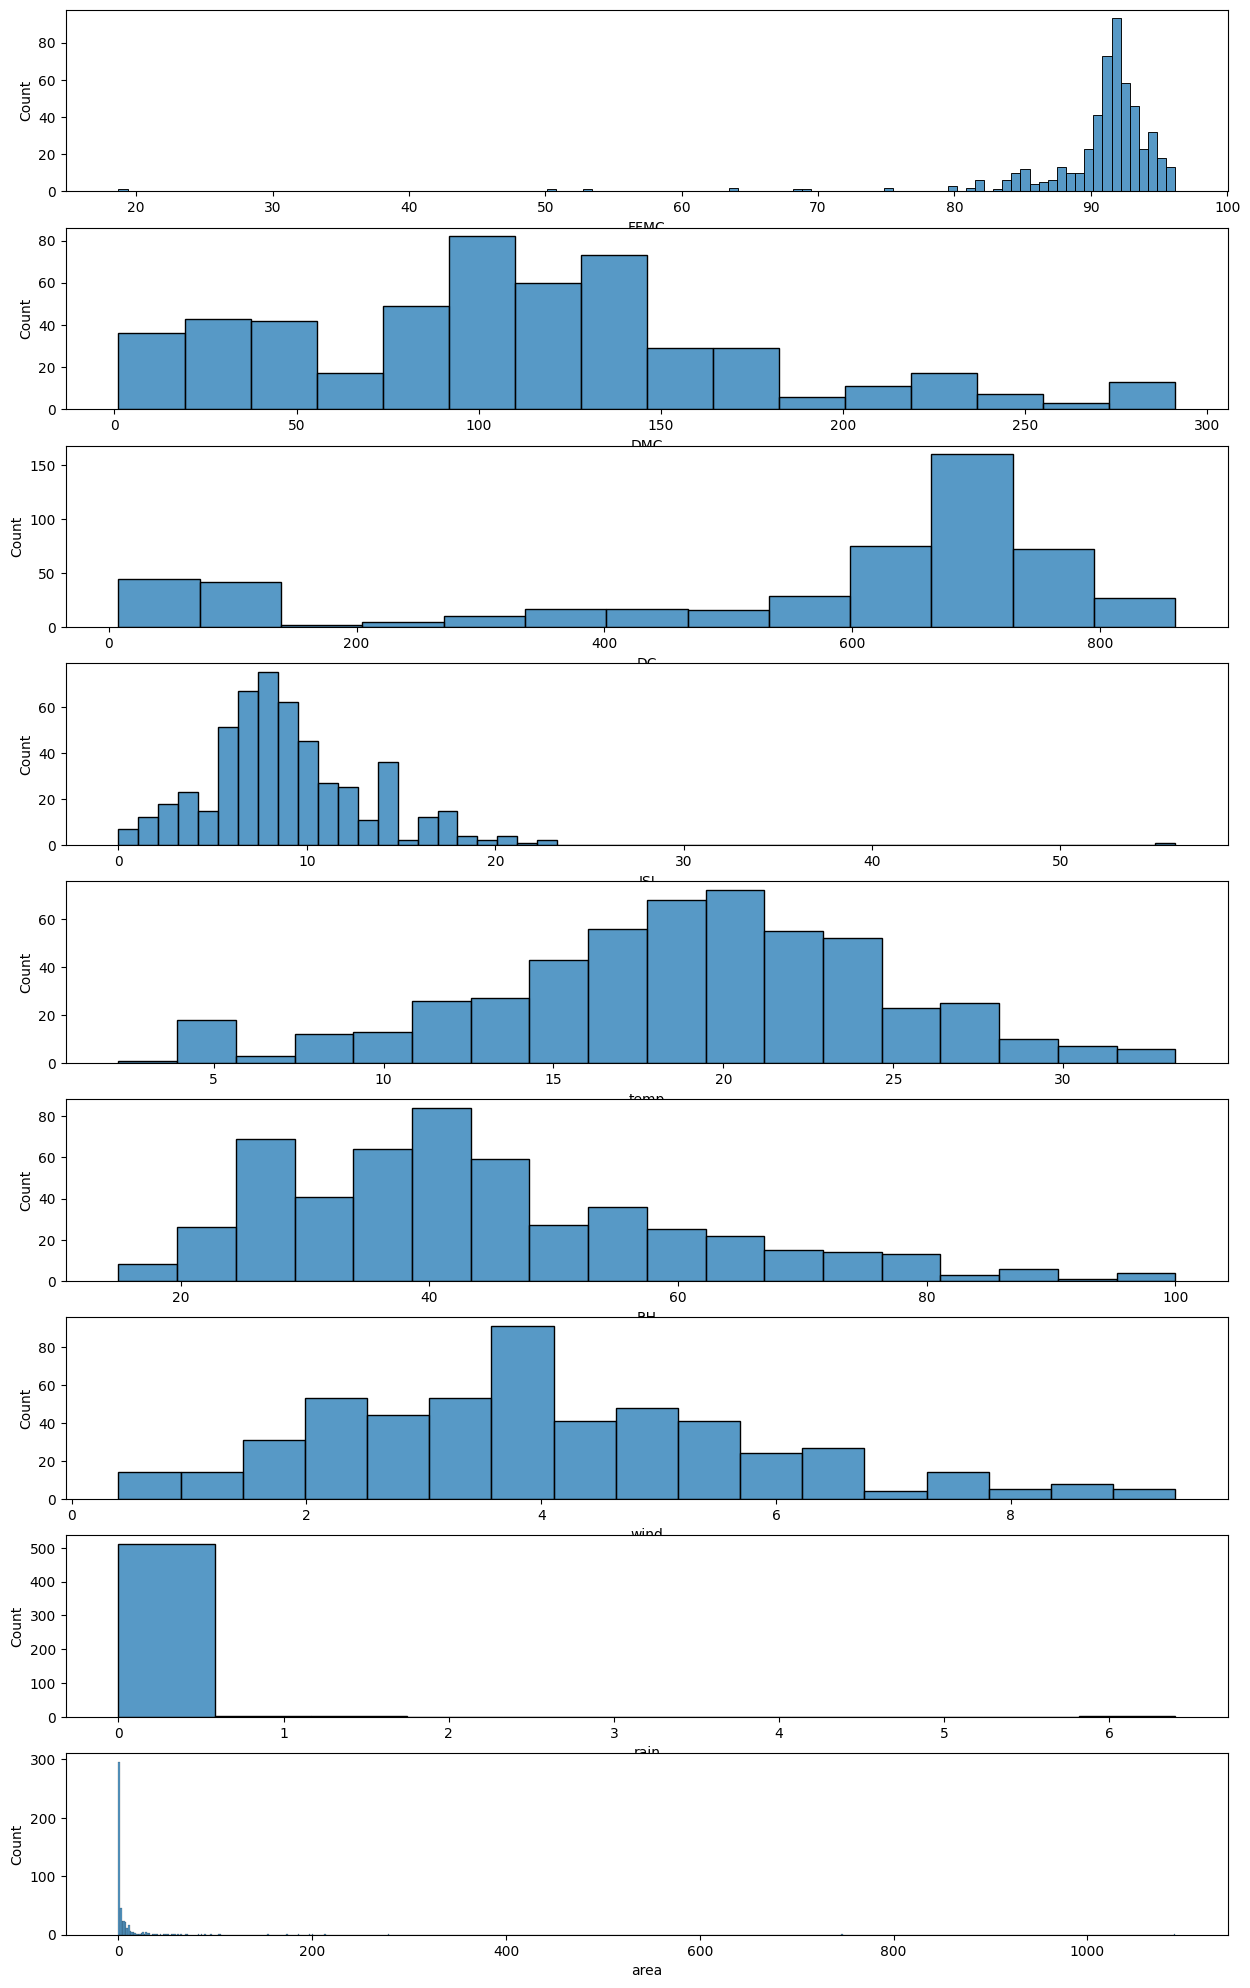

In [ ]:
#histogram for all numerical_features
fig,ax=plt.subplots(len(numerical_features),1,figsize=(15,25))

for i in range(0,len(numerical_features)):
  sns.histplot(forest_1[numerical_features[i]],ax=ax[i])
  

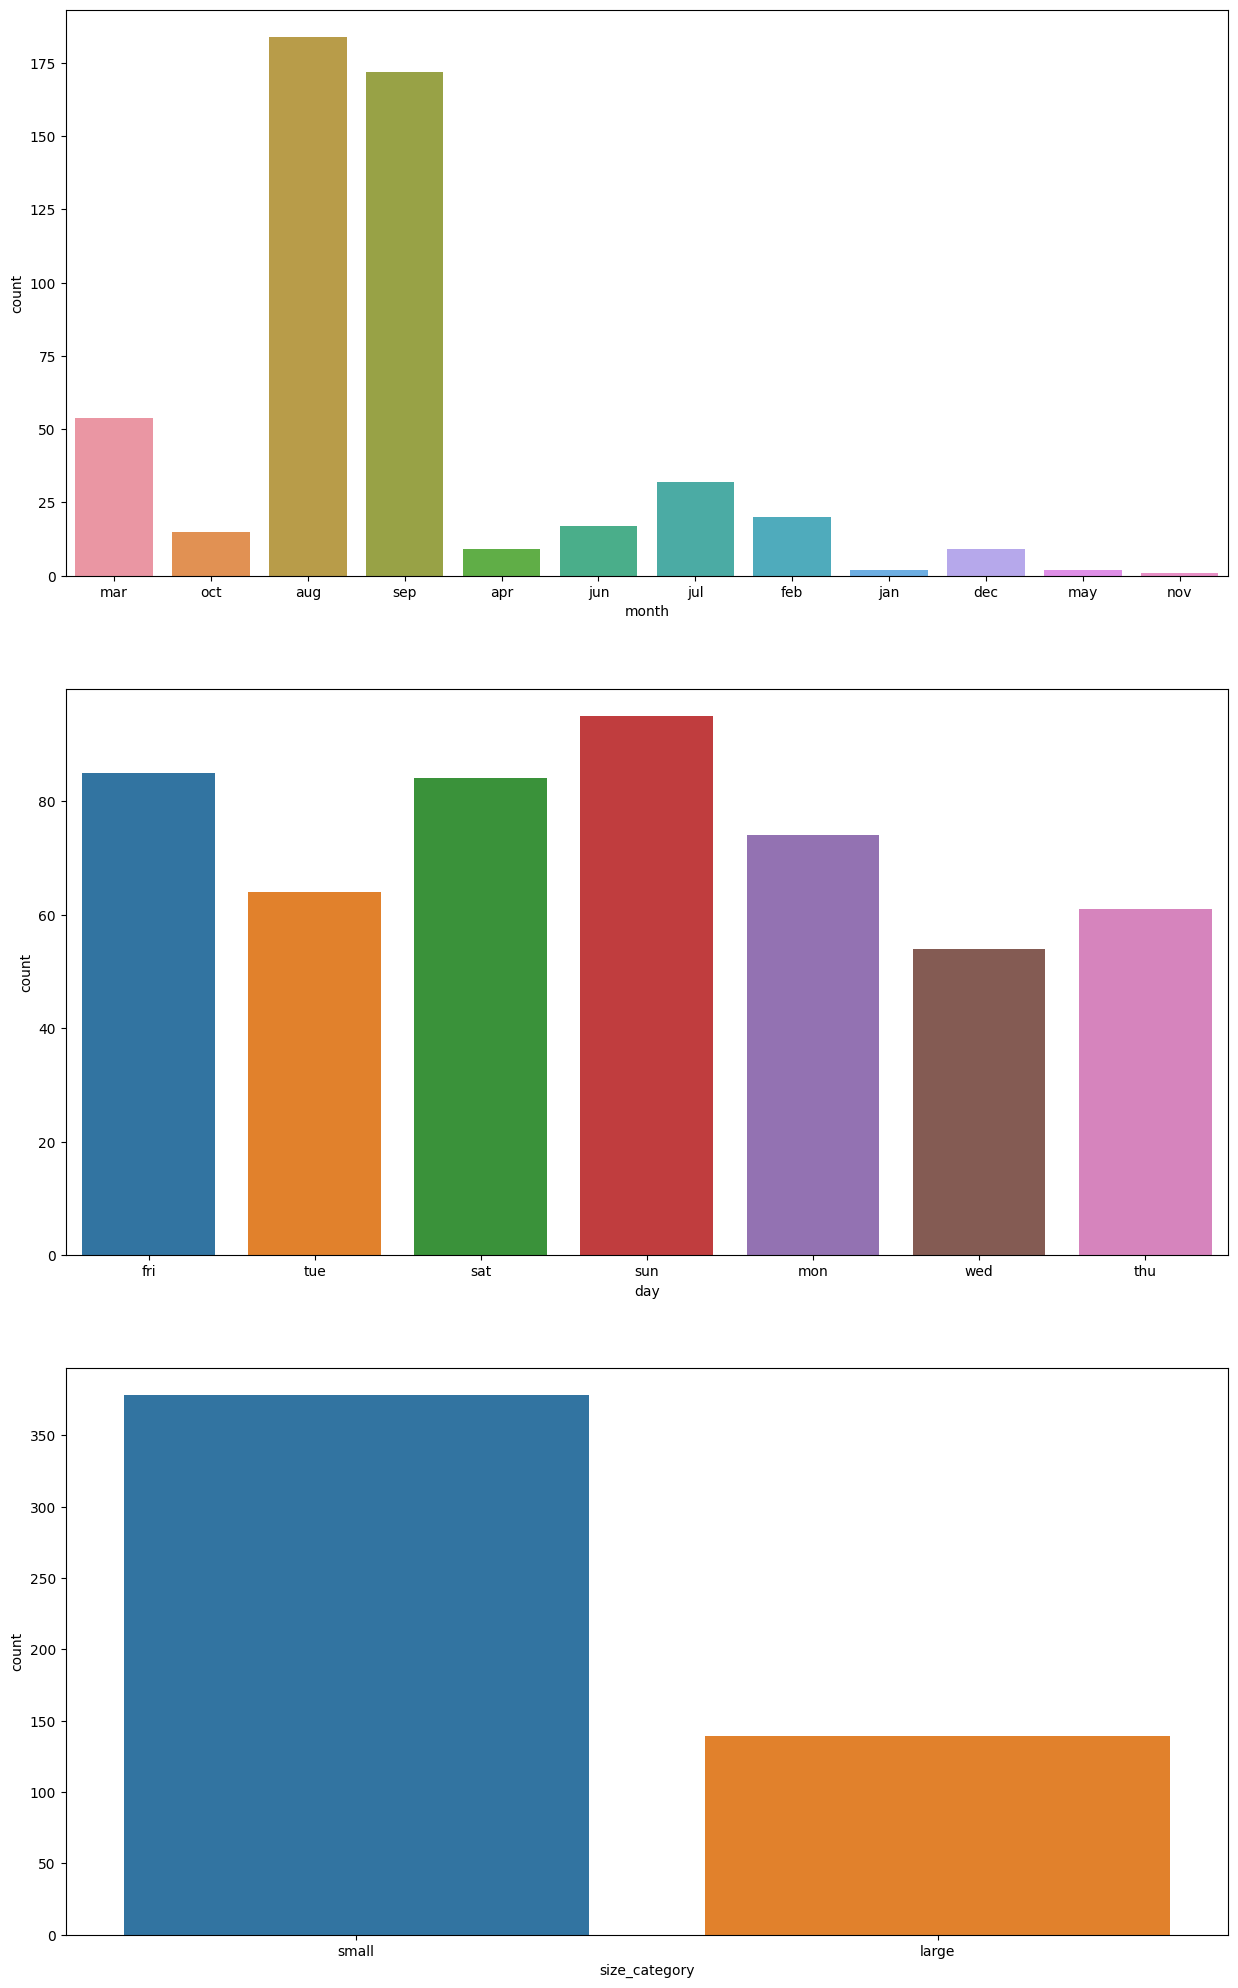

In [ ]:
fig,ax=plt.subplots(len(categorical_features),1,figsize=(15,25))

for i in range(0,len(categorical_features)):
  for i in range (0, len(categorical_features)):
    sns.countplot(x=categorical_features[i],ax=ax[i],data=forest_1)
     

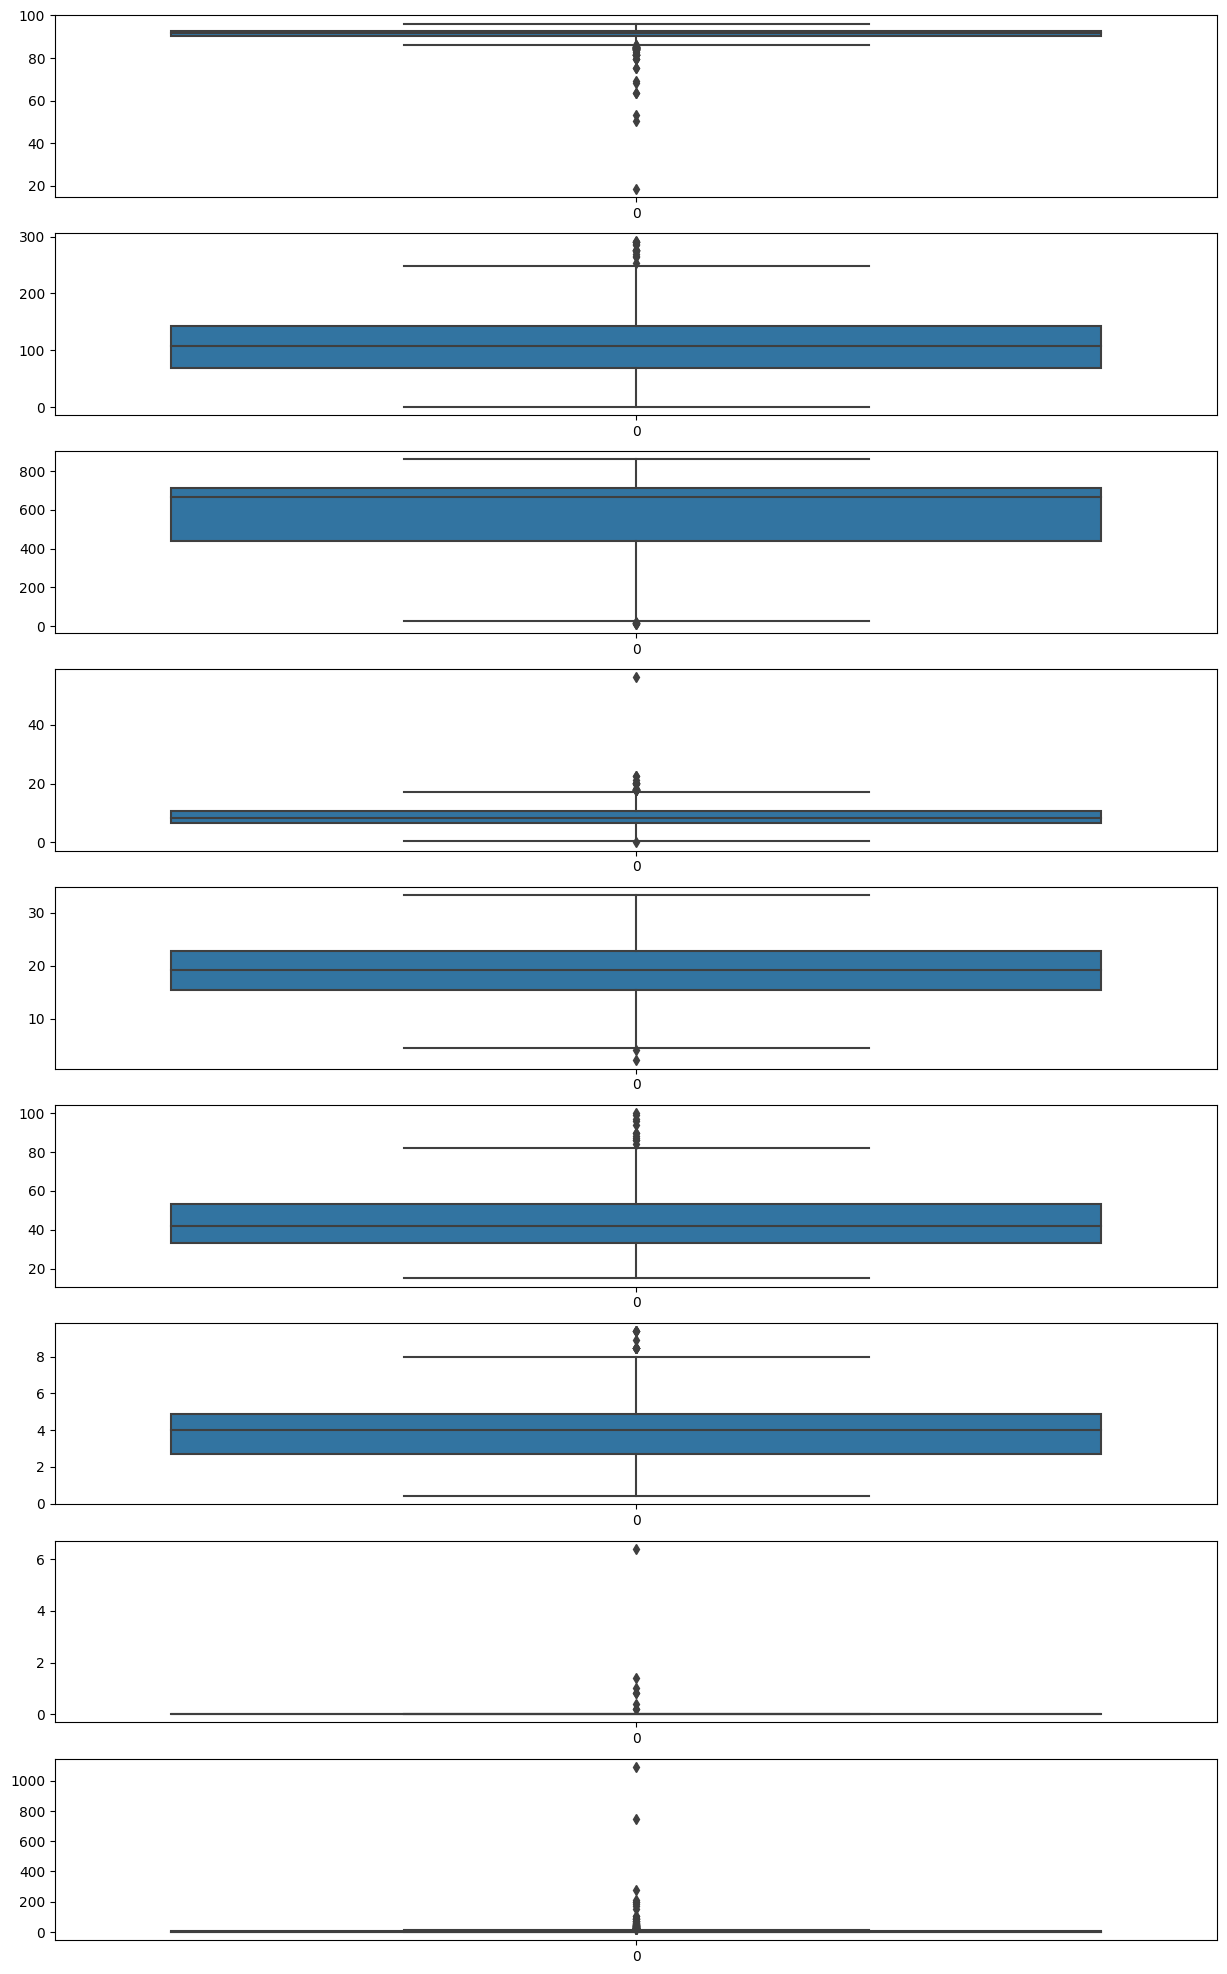

In [ ]:
fig,ax=plt.subplots(len(numerical_features),1,figsize=(15,25))

for i in range(0,len(numerical_features)):
  sns.boxplot(forest_1[numerical_features[i]],ax=ax[i])

<Axes: >

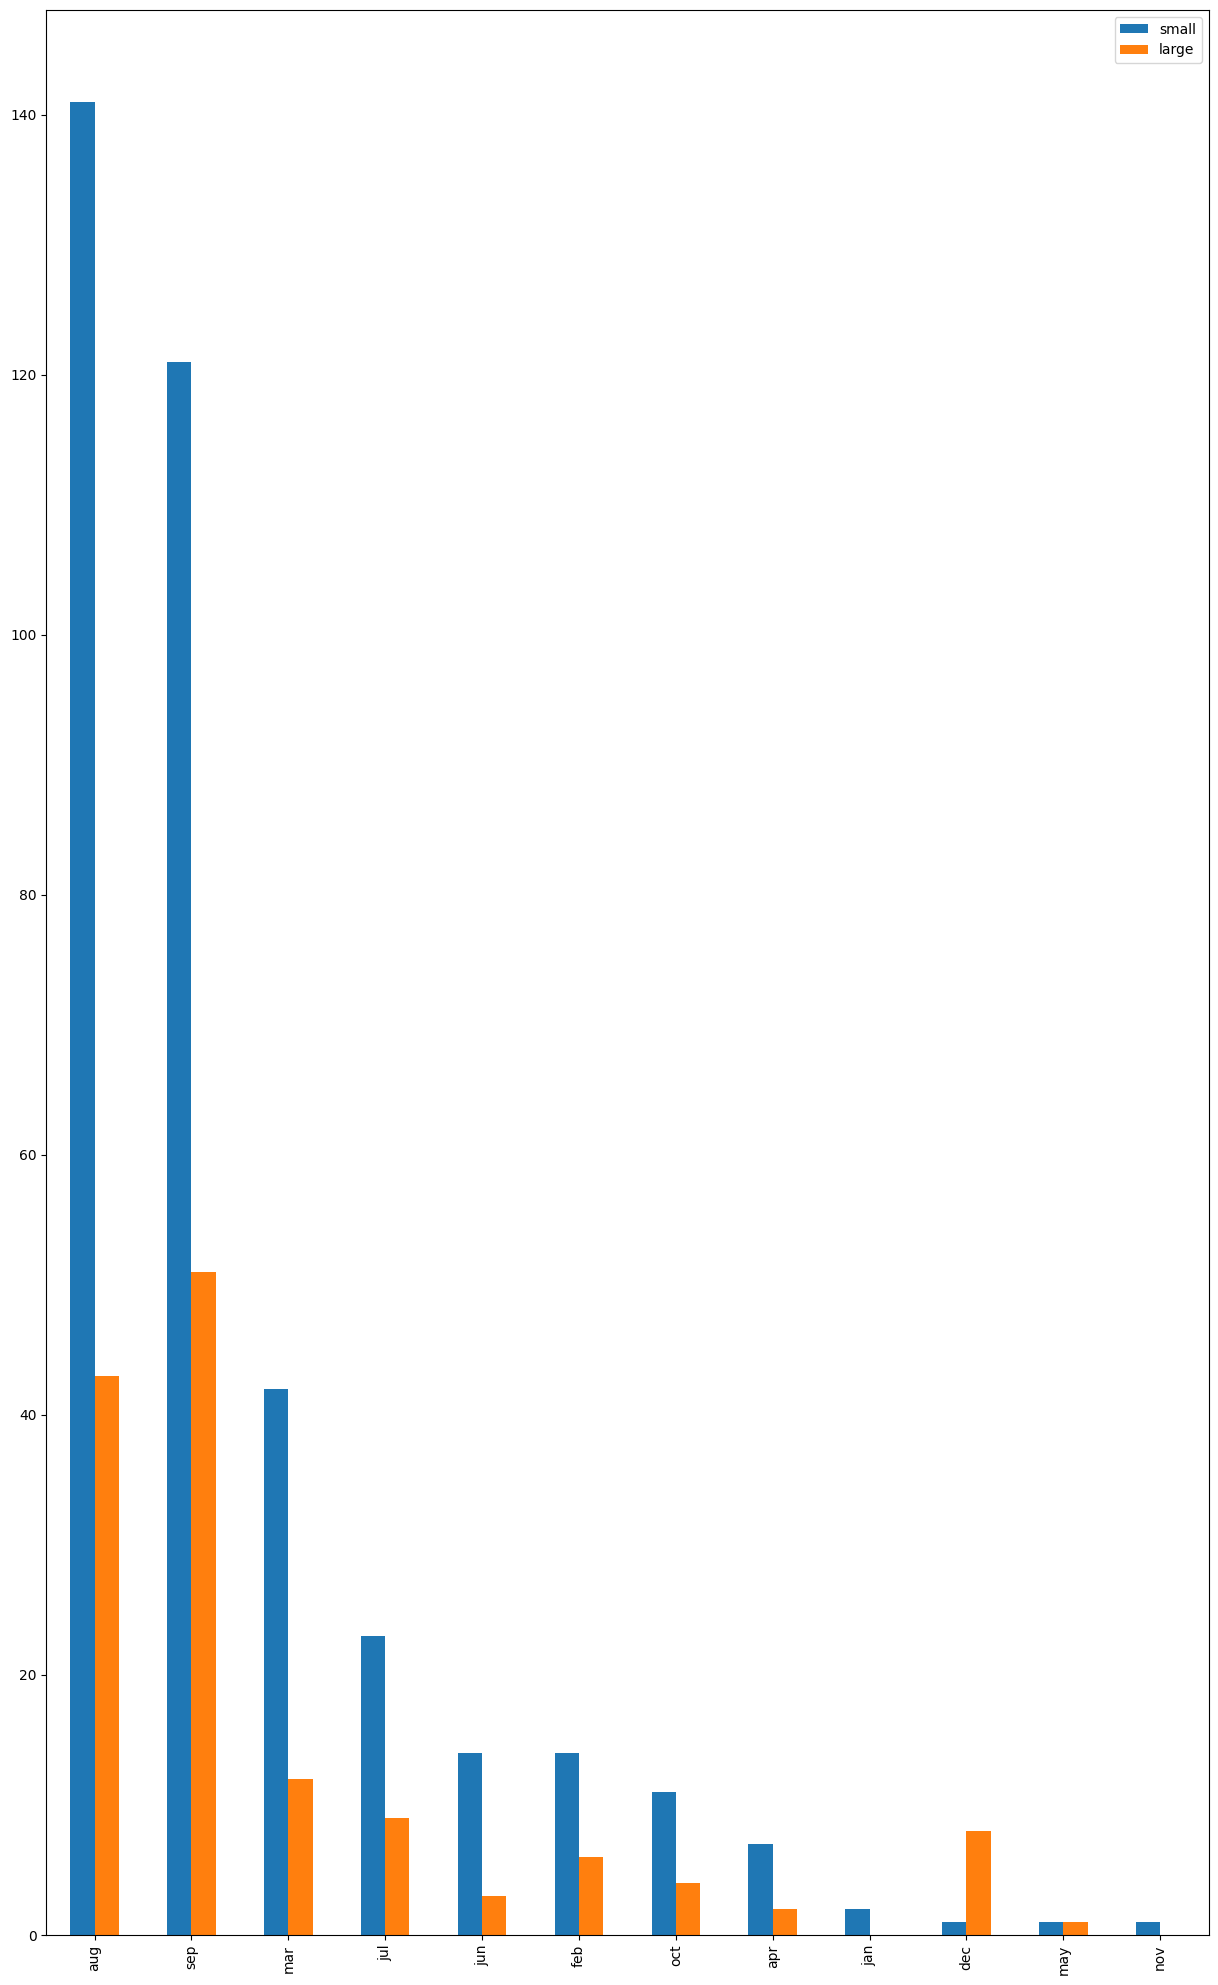

In [ ]:
#in absolute number
df=pd.DataFrame()

df["small"]=forest_1[forest_1["size_category"]=="small"]["month"].value_counts()
df["large"]=forest_1[forest_1["size_category"]=="large"]["month"].value_counts()

df.plot.bar(figsize=(15,25))

<Axes: >

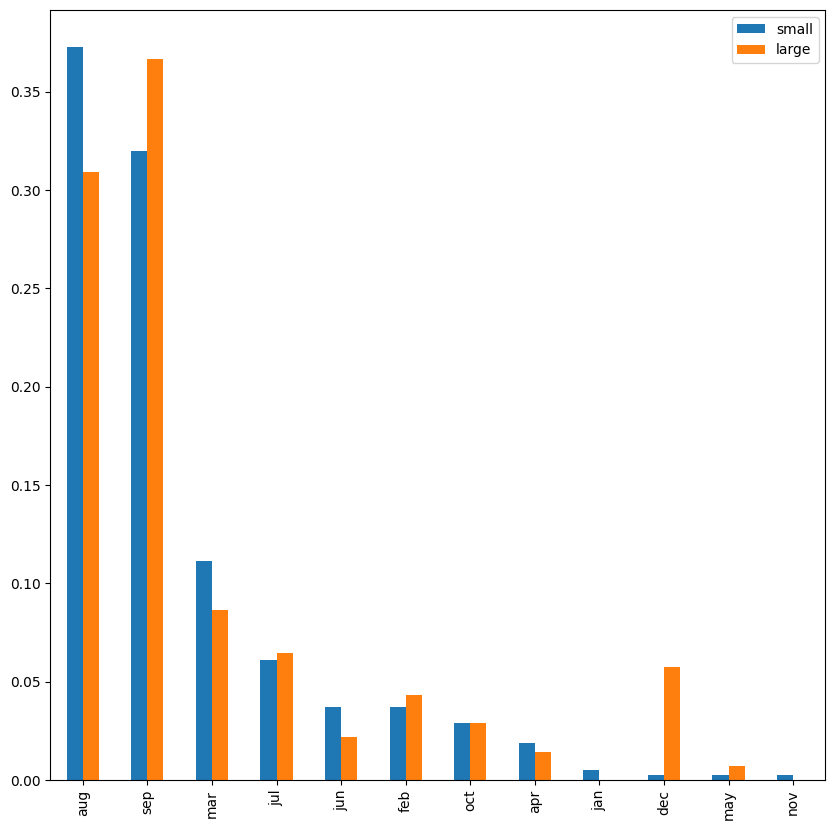

In [ ]:
from sklearn.metrics.pairwise import normalize
#in percentage
df=pd.DataFrame()

df["small"]=forest_1[forest_1["size_category"]=="small"]["month"].value_counts(normalize=True)
df["large"]=forest_1[forest_1["size_category"]=="large"]["month"].value_counts(normalize=True)

df.plot.bar(figsize=(10,10))

Data preprocessing

In [ ]:
x=forest.copy()
x.drop("size_category",inplace=True,axis=1)
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [ ]:
y=forest_1.loc[:,["size_category"]]


,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [ ]:
x.drop(["month","day"],axis=1,inplace=True)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
from pandas.core.common import random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [ ]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (387, 28)
x_test (130, 28)
y_train (387,)
y_test (130,)


model building

In [ ]:
model=SVC()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.7384615384615385

- grid search cv for hyperparameter tunning

In [ ]:
model = SVC()
param_grid = [{'kernel':['rbf', 'linear', 'poly'],'gamma':[50,5,10,0.5,0.2,0.1],
               'C':[100,90,75,55,50,45,20,10,0.1,0.001],'degree': [2,3,4] }]

gsv = GridSearchCV(model,param_grid)
gsv.fit(x_train,y_train) 

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [100, 90, 75, 55, 50, 45, 20, 10, 0.1, 0.001],
                          'degree': [2, 3, 4],
                          'gamma': [50, 5, 10, 0.5, 0.2, 0.1],
                          'kernel': ['rbf', 'linear', 'poly']}])

In [ ]:
print(gsv.best_score_)
print(gsv.best_params_)

0.9844821844821844
{'C': 0.1, 'degree': 2, 'gamma': 50, 'kernel': 'linear'}


In [ ]:
classifier = gsv.best_estimator_

classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, pred) 
print("Accurcy of SVM is:", accuracy)

Accurcy of SVM is: 0.9769230769230769


In [ ]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.99      0.98      0.98        93

    accuracy                           0.98       130
   macro avg       0.97      0.98      0.97       130
weighted avg       0.98      0.98      0.98       130



<Axes: >

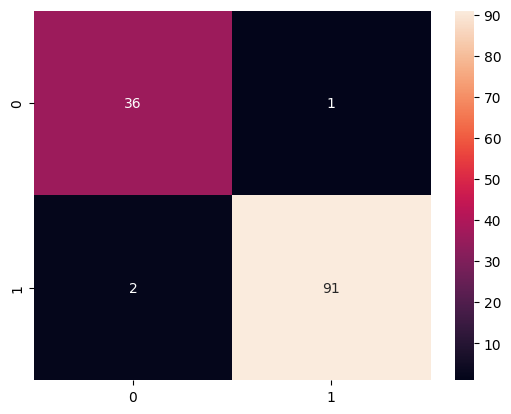

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d') 

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,pred)
print('AUC-ROC Score:',auc) 

AUC-ROC Score: 0.9757337983144436
